# How to Automate Feature Engineering with AI

In this tutorial, we will learn how to automate feature engineering with AI using the Feature Engineering Agent. The Feature Engineering Agent is a powerful tool that can automatically generate features for your data. It analyzes your data and determines necessary actions to prepare it for machine learning including:

- One Hot Encoding
- Missing Value Imputation
- Outlier Detection


### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [How to Automate Feature Engineering with AI](#how-to-automate-feature-engineering-with-ai)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
7. [The feature engineering recipe](#the-feature-engineering-recipe)
8. [Feature Engineer Function](#feature-engineer-function)
9. [Feature Engineered Data As Pandas Data Frame](#feature-engineered-data-as-pandas-data-frame)
10. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

### Load Libraries

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import FeatureEngineeringAgent

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7f8fb07e8e80>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7f8fb07e8610>, root_client=<openai.OpenAI object at 0x7f8fb0acfe50>, root_async_client=<openai.AsyncOpenAI object at 0x7f8fb07e8e20>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Load a Dataset

Next, let's load a customer churn data set that we will clean up. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent

Run this code to create the agent with `make_feature_engineering_agent()`.

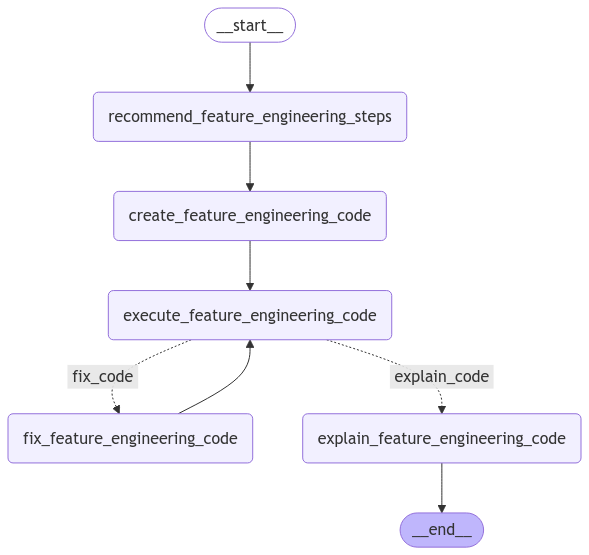

In [4]:
feature_engineering_agent = FeatureEngineeringAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH
)

feature_engineering_agent

The main inputs to the Feature Engineering Agent are:

- **data_raw**: The raw data to have engineered feature transformations applied.
- **user_instructions**: The data cleaning agent will use these comments to modify the "standard recipe" (optional). See the documentation for the standard feature engineering steps that are evaluated for application by the LLM. 
- **target_variable**: The column name of the target variable (optional).
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [ ]:
feature_engineering_agent.invoke_agent(
    data_raw=df,
    user_instructions="Inspect the data. Make any new features and transformations that you think will be useful for predicting the target variable.",
    target_variable="Churn",
    max_retries=3,
    retry_count=0,
)

---FEATURE ENGINEERING AGENT----
    * RECOMMEND FEATURE ENGINEERING STEPS
    * CREATE FEATURE ENGINEERING CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/feature_engineer.py
    * EXECUTING AGENT CODE
'Churn'
    * FIX AGENT CODE
      retry_count:0
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/feature_engineer.py
    * EXECUTING AGENT CODE
    * EXPLAIN AGENT CODE


### Response

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [6]:
response = feature_engineering_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'data_engineered',
 'target_variable',
 'all_datasets_summary',
 'feature_engineer_function',
 'feature_engineer_function_path',
 'feature_engineer_function_name',
 'feature_engineer_error',
 'max_retries',
 'retry_count']

#### Feature Engineered Data

In [7]:
feature_engineering_agent.get_data_engineered()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,MonthlyCharges_per_tenure
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,False,14.925000
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,1.627143
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,True,17.950000
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,0.919565
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,23.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,True,False,True,False,False,True,False,3.392000
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,True,False,True,True,False,False,False,1.413699
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,True,False,True,False,False,2.466667
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,True,False,False,True,True,14.880000


#### Feature Engineer Function

In [8]:
feature_engineering_agent.get_feature_engineer_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: feature_engineering_agent
# Time Created: 2025-01-10 08:17:47

def feature_engineer(data_raw):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder



    # Step 1: Convert Data Types
    data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')

    # Step 2: Remove Unique Value Features
    data_raw.drop(columns=['customerID'], inplace=True)

    # Step 3: Remove Constant Features
    # (No constant features to remove as per the provided information)

    # Step 4: Encode High Cardinality Features
    high_cardinality_threshold = 0.05 * data_raw.shape[0]  # 5% of dataset size
    for column in data_raw.select_dtypes(include=['object']).columns:
        if data_raw[column].nunique() > high_cardinality_threshold:
            # Count frequencies of each category
            freq = data_raw[column].value_counts()
            # Create a mask for infrequent values
            mask = data_raw[column].isin(freq[freq >= high_cardinality_threshold].index)
            # Replace infrequent values with 'other'
            data_raw.loc[~mask, column] = 'other'

    # Step 5: One-Hot Encoding for Categorical Variables
    categorical_features = data_raw.select_dtypes(include=['object']).columns.tolist()
    data_raw = pd.get_dummies(data_raw, columns=categorical_features, drop_first=True)

    # Check if 'Churn' column exists before encoding
    if 'Churn' in data_raw.columns:
        # Step 6: Encode Target Variable
        label_encoder = LabelEncoder()
        data_raw['Churn'] = label_encoder.fit_transform(data_raw['Churn'])

    # Step 7: Convert Boolean Features
    # SeniorCitizen is already numeric and will be retained as is.
    # Ensure that any potential future boolean features are converted to integers.

    # Step 9: Analyze Data for Additional Features
    # Example of creating new features:
    data_raw['MonthlyCharges_per_tenure'] = data_raw['MonthlyCharges'] / (data_raw['tenure'] + 1)  # Avoid division by zero

    # Step 10: Finalize Feature Set
    # Return the engineered dataset
    return data_raw
```

#### Feature Engineeering Recommended Steps

In [9]:
feature_engineering_agent.get_recommended_feature_engineering_steps(markdown=True)



# Recommended Feature Engineering Steps:
1. **Convert Data Types**: Convert the `TotalCharges` column from object to float, as it contains numeric values. This will ensure that all numeric operations can be performed on this feature.

2. **Remove Unique Value Features**: Remove the `customerID` column, as it has unique values equal to the size of the dataset (7043 unique values). This feature does not contribute to the prediction model.

3. **Remove Constant Features**: Check for any constant features. If any exist (i.e., features with the same value in all rows), remove them. In the provided data, there are no constant features identified.

4. **Encode High Cardinality Features**: Analyze categorical features and apply a threshold of 5% of the dataset size (which is 352). For high cardinality categorical features, convert infrequent values to "other". Check features like `PaymentMethod` and apply this transformation if necessary.

5. **One-Hot Encoding for Categorical Variables**: Apply OneHotEncoding to the categorical features, such as `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, and `PaperlessBilling`.

6. **Encode Target Variable**: Convert the `Churn` column to numeric using Label Encoding, as it is a categorical target variable with two unique values. This will prepare it for modeling.

7. **Convert Boolean Features**: Convert the `SeniorCitizen` feature (which is already numeric) to an integer type if necessary, but it is already in the correct format. Ensure that any other Boolean features that may be added in future datasets are converted to integers (1/0).

8. **Create Datetime Features (if applicable)**: Check if there are any datetime columns in the dataset. If any are present, extract features such as year, month, day, etc. Since there are no datetime columns in the provided data, this step is not applicable.

9. **Analyze Data for Additional Features**: Perform an analysis of the existing features to determine if there are opportunities to create new features. For instance, consider creating ratios (e.g., MonthlyCharges per tenure) or aggregating features (e.g., total services subscribed) that could enhance model performance.

10. **Finalize Feature Set**: Review the engineered features and ensure that they align with the modeling goals. If all necessary transformations have been implemented and no additional features are needed, confirm the completion of the feature engineering process.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)